# Homework 4


## Ex 15.17 Binary Classification with the Breast Cancer Dataset on page 661.

## Step 1. Import libaries

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## Step 2. Loading the Daatset

In [123]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [124]:
breast_cancer.data.shape

(569, 30)

In [125]:
breast_cancer.target.shape

(569,)

## Step 3. Splitting the Data for Training and Testing

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=42)

Training and Testing Set Size

In [127]:
x_train.shape


(426, 30)

In [128]:
x_test.shape


(143, 30)

In [129]:
y_train.shape


(426,)

In [130]:
y_test.shape

(143,)

## Step 4. Creating the Model(GaussianNB)

In [131]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


## Step 5. Training the Model

In [132]:
nb.fit(x_train, y_train)


,priors,None
,var_smoothing,1e-09


## Step 6. Predicting

In [133]:
Predicted = nb.predict(x_test)
Predicted

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [134]:
expected = y_test
expected

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

## Step 7. Estimator Method Score


In [135]:
nb.score(x_test, y_test)


0.958041958041958

## Step 8. Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = expected ,y_pred = Predicted)
cm

array([[51,  3],
       [ 3, 86]])

## Step 9. Classification Report

In [137]:
from sklearn.metrics import classification_report

cr = classification_report(y_true = expected ,y_pred = Predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Step 10. Visualize the Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

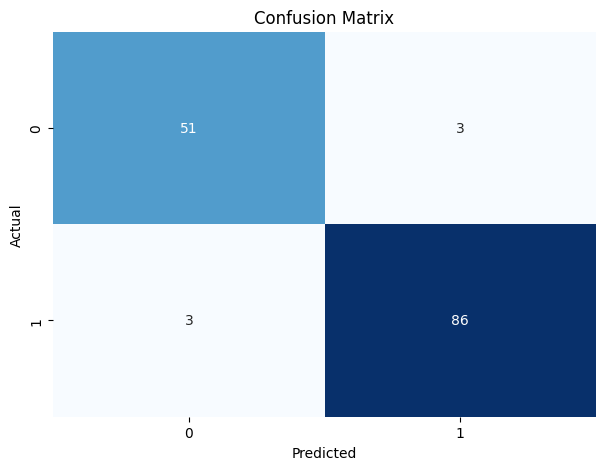

In [138]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


## Syep 11. K-Fold Cross-Validation

In [139]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=11)


In [140]:

score = cross_val_score(estimator=nb, X = breast_cancer.data, y = breast_cancer.target , cv=kfold)

In [141]:
score.mean()

np.float64(0.9384711779448622)

## Step 12. Running Multiple Models to Find the Best One

In [142]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [143]:
estimators = {
            'GaussianNB': nb,
            'KNeighborsClassifier': KNeighborsClassifier(), 
            'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
            'SVC': SVC(gamma='scale')}

In [121]:
for estimator_name, estimator_object in estimators.items():
    kf = KFold(n_splits=10, shuffle=True, random_state=11)
    score = cross_val_score(estimator=estimator_object, X= breast_cancer.data, y= breast_cancer.target, cv=kfold)
    print(f"{estimator_name:>20}: " + 
          f"mean accuracy={score.mean():.2%};" + 
          f"standard deviation {score.std():.2%}")

          GaussianNB: mean accuracy=93.85%;standard deviation 2.75%
KNeighborsClassifier: mean accuracy=92.79%;standard deviation 2.01%


c:\Users\Aceon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Aceon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Aceon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Aceon\AppD

  LogisticRegression: mean accuracy=95.26%;standard deviation 2.72%
                 SVC: mean accuracy=91.92%;standard deviation 3.52%
